In [ ]:
#Importing all the Libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

fb=pd.read_csv('GAIL.NS.csv',parse_dates=True,index_col='Date')
fb=fb.drop(columns=['Adj Close','Open','Low','High','Volume'])

Saving GAIL.NS.csv to GAIL.NS.csv


In [ ]:
fin =fb
fin

,Close
Date,
2008-01-01,101.811996
2008-01-02,99.731201
2008-01-03,101.005997
2008-01-04,101.005997
2008-01-07,97.753098
...,...
2020-10-26,85.500000
2020-10-27,84.199997
2020-10-28,83.099998


In [ ]:
fb=fb.asfreq(freq='D',method='bfill')
fin = fin.asfreq(freq='D',method='bfill')
fin

,Close
Date,
2008-01-01,101.811996
2008-01-02,99.731201
2008-01-03,101.005997
2008-01-04,101.005997
2008-01-05,97.753098
...,...
2020-10-26,85.500000
2020-10-27,84.199997
2020-10-28,83.099998


In [ ]:
fb

,Close
Date,
2008-01-01,101.811996
2008-01-02,99.731201
2008-01-03,101.005997
2008-01-04,101.005997
2008-01-05,97.753098
...,...
2020-10-26,85.500000
2020-10-27,84.199997
2020-10-28,83.099998



#Forecasting Procedure:
   
   1.)Choose a Model
   2.)Split the Data into Training and Test Data
   3.)Fit the Model on Training Data
   4.)Evaluate the Model on Test Data
   5.)Re-Fit the Model on Entire Data
   6.)Forecast for Future Data
   
   

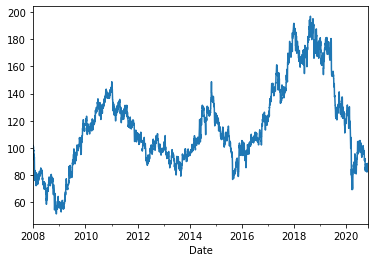

In [ ]:
fb['Close'].plot()

In [ ]:
fb=fb.fillna(method='ffill')
fin = fin.fillna(method='ffill')

In [ ]:
fb.isnull().values.any()
fin.isnull().values.any()

False

In [ ]:
breakup=seasonal_decompose(fb['Close'],model='additive')

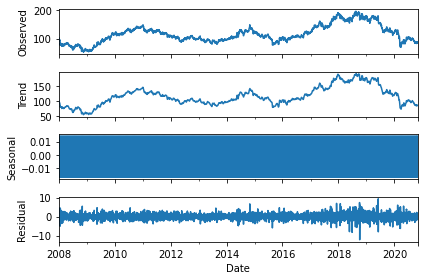

In [ ]:
breakup.plot();

In [ ]:
len(fb)

4687

In [ ]:
train_fb=fb.iloc[:-468]
test_fb=fb.iloc[-468:]

In [ ]:
train_fb.tail()

,Close
Date,
2019-07-16,147.350006
2019-07-17,143.399994
2019-07-18,141.949997
2019-07-19,137.600006
2019-07-20,138.000000


In [ ]:
test_fb.head()

,Close
Date,
2019-07-21,138.000000
2019-07-22,138.000000
2019-07-23,138.600006
2019-07-24,136.649994
2019-07-25,134.750000


# Exponential Smoothing


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
test_fb_model=ExponentialSmoothing(train_fb['Close'],trend='add',seasonal='mul',seasonal_periods=150).fit()

In [ ]:
test_fb_predictions=test_fb_model.forecast(468)

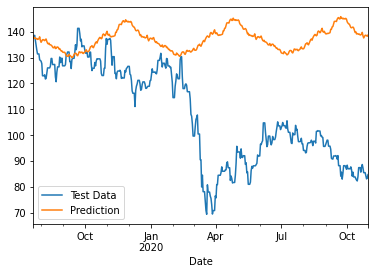

In [ ]:

test_fb['Close'].plot(legend=True,label='Test Data')
test_fb_predictions.plot(legend=True,label='Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
std=fb['Close'].std()
rmse=np.sqrt(mean_squared_error(test_fb['Close'],test_fb_predictions))
rmse,std

(35.72537469759878, 30.89583380521656)

In [ ]:
fb_ES_model=ExponentialSmoothing(fb['Close'],trend='add',seasonal='mul',seasonal_periods=90).fit()
fb_ES_Predictions=fb_ES_model.forecast(240)


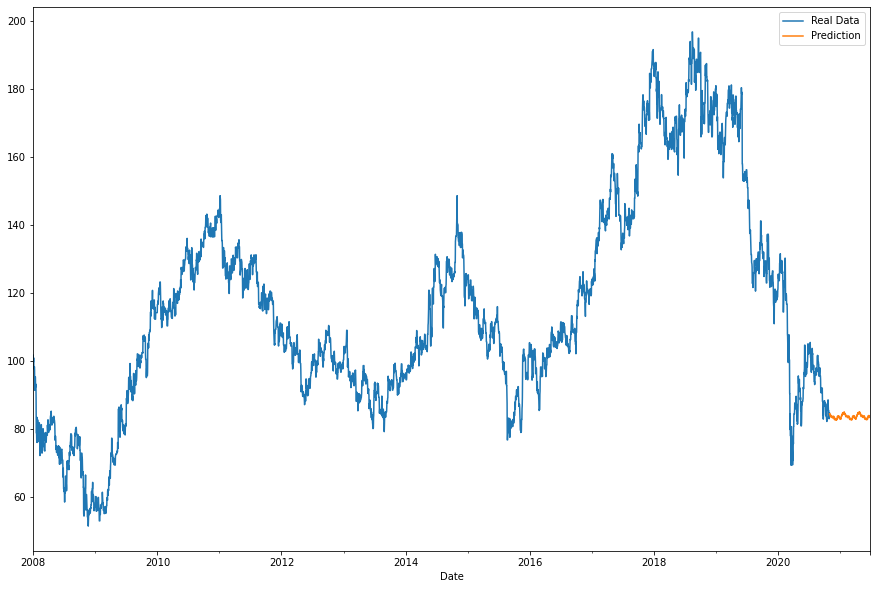

In [ ]:
fb['Close'].plot(legend=True,label='Real Data',figsize=(15,10))
fb_ES_Predictions.plot(legend=True,label='Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_fb['Close'], test_fb_predictions) 

29.350064344212228

In [ ]:
mape = np.mean(np.abs((test_fb['Close'] -test_fb_predictions)/test_fb['Close']))*100
mape

31.458709191698397

# ARIMA


In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
fin

,Close
Date,
2008-01-01,101.811996
2008-01-02,99.731201
2008-01-03,101.005997
2008-01-04,101.005997
2008-01-05,97.753098
...,...
2020-10-26,85.500000
2020-10-27,84.199997
2020-10-28,83.099998


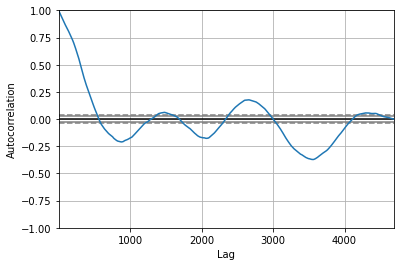

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fin)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 4685
Model:                 ARIMA(1, 2, 0)   Log Likelihood              -10652.355
Method:                       css-mle   S.D. of innovations              2.351
Date:                Wed, 02 Dec 2020   AIC                          21310.710
Time:                        22:06:24   BIC                          21330.066
Sample:                    01-03-2008   HQIC                         21317.516
                         - 10-30-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.023      0.018      0.986      -0.045       0.045
ar.L1.D2.Close    -0.4942      0.013    -38.910      0.000      -0.519      -0.469
                                    

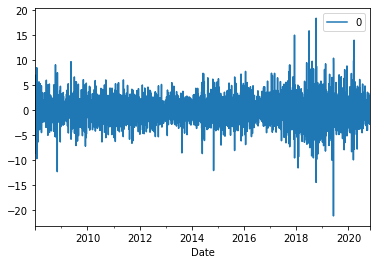

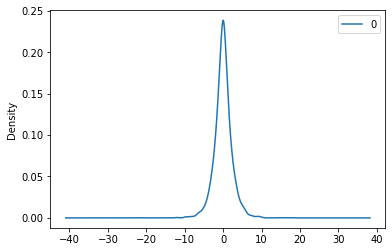

                 0
count  4685.000000
mean      0.000354
std       2.351154
min     -21.177951
25%      -1.171488
50%      -0.000624
75%       1.148801
max      18.413577


In [ ]:
from pandas import DataFrame
model = ARIMA(fin, order=(1,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
pyplot

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [ ]:
import math
from sklearn.metrics import mean_squared_error
X = fin.values
size = int(len(X) * 0.66)
train, test = X[0:1000], X[4501:4685]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,2,0))
	model_fit = model.fit(disp=1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))



predicted=134.960078, expected=84.550003
predicted=34.093637, expected=89.099998
predicted=93.656624, expected=95.699997
predicted=102.308668, expected=93.500000
predicted=91.299884, expected=93.500000
predicted=93.502075, expected=93.500000
predicted=93.502073, expected=93.500000
predicted=93.502070, expected=91.099998
predicted=88.699679, expected=94.699997
predicted=98.305637, expected=91.500000
predicted=88.298893, expected=91.349998
predicted=91.201910, expected=92.050003
predicted=92.752761, expected=92.050003
predicted=92.052061, expected=92.050003
predicted=92.052059, expected=88.699997
predicted=85.348738, expected=89.349998
predicted=90.002692, expected=85.449997
predicted=81.548204, expected=85.800003
predicted=86.152402, expected=81.000000
predicted=76.197323, expected=81.000000
predicted=81.002044, expected=81.000000
predicted=81.002042, expected=81.849998
predicted=82.702869, expected=86.250000
predicted=90.656350, expected=87.949997
predicted=89.653693, expected=87.19999

In [ ]:
error = mean_squared_error(test, predictions)
rmse = math.sqrt(error)
print('Test RMSE: %.3f' % rmse)
# plot

Test RMSE: 6.052


In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test, predictions) 

2.3768943117612453

In [ ]:
mape = np.mean(np.abs((test - predictions)/test))*100
mape


2.5908028965686505

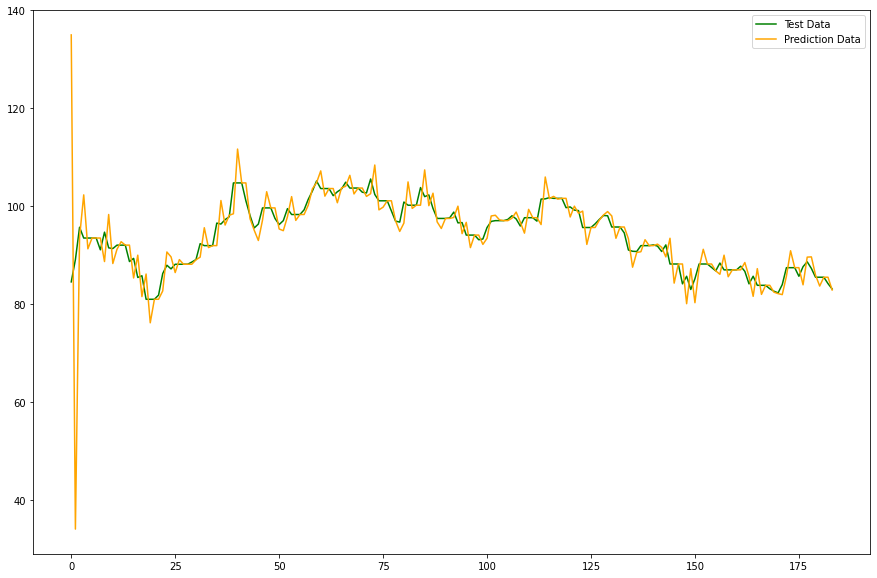

In [ ]:
plt.figure(figsize=(15,10))

pyplot.plot(test, color = 'green')
pyplot.plot(predictions, color='orange')
pyplot.legend(['Test Data','Prediction Data'])
pyplot.show()

## NEW ARIMA


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()